In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
from pybedtools import BedTool
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from scipy.spatial.distance import pdist, squareform
from plot_params import *
basedir= Path('/tscc/nfs/home/hsher/scratch/ABC_2rep/')
out_stem = 'K562_rep6'
#fl='/home/hsher/scratch/K562_rep4.count.csv'
megaoutput = pd.read_csv(basedir/f'DMM/{out_stem}.megaoutputs.tsv', sep = '\t', index_col = 0)

In [2]:
ground_truth = pd.read_csv('Dan_multiplex1_K562_rep4.Dan_multiplex1_K562_rep6.reproducible_window.csv',
                          index_col = 0)
ground_truth_r1 = pd.read_csv('Dan_multiplex1_K562_rep6.window.csv',
                          index_col = 0)
ground_truth_skipper = pd.read_csv('ABC_K562.skipper_reproducible_window.csv',
                          index_col = 0)
ground_truth_skipper.rename({'DDX3X':'DDX3'}, axis = 1, inplace = True)
ground_truth_skipper.sum().sort_values()

EIF3G         213
ZC3H11A      4722
PUM2         7147
RBFOX2      12206
DDX3        12334
LIN28B      26668
IGF2BP2     28834
SF3B4       44025
FAM120A     50622
PRPF8      102243
dtype: int64

In [3]:
frac_is_continuous = {}
for rbp in ground_truth_skipper.columns:
    next_is_pos = 0
    for i, row in megaoutput.loc[megaoutput[f'{out_stem}.{rbp}']].iterrows():
        if i+1 in megaoutput.index:
            next_is_pos += megaoutput.loc[i+1, f'{out_stem}.{rbp}']
    frac_is_continuous[rbp] = next_is_pos/megaoutput.loc[megaoutput[f'{out_stem}.{rbp}']].shape[0]

In [4]:
frac_eclip_is_continuous = {}
for rbp in ground_truth_skipper.columns:
    next_is_pos = 0
    for i, row in ground_truth_skipper.loc[ground_truth_skipper[f'{rbp}']].iterrows():
        if i+1 in ground_truth_skipper.index:
            next_is_pos += ground_truth_skipper.loc[i+1, f'{rbp}']
    frac_eclip_is_continuous[rbp] = next_is_pos/ground_truth_skipper.loc[ground_truth_skipper[f'{rbp}']].shape[0]

In [5]:
frac_clipper_is_continuous = {}
for rbp in ground_truth_r1.columns:
    next_is_pos = 0
    for i, row in ground_truth_r1.loc[ground_truth_r1[f'{rbp}']].iterrows():
        if i+1 in ground_truth_r1.index:
            next_is_pos += ground_truth_r1.loc[i+1, f'{rbp}']
    frac_clipper_is_continuous[rbp] = next_is_pos/ground_truth_r1.loc[ground_truth_r1[f'{rbp}']].shape[0]

/tscc/nfs/home/hsher/miniconda3/envs/my_metadensity/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


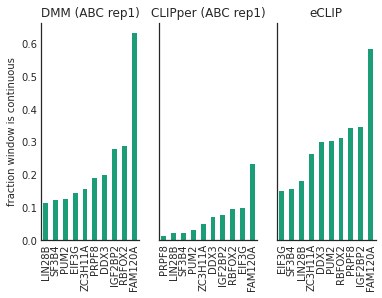

In [6]:
f, ax = plt.subplots(1,3, sharey = True)
pd.Series(frac_is_continuous).sort_values().plot.bar(ax = ax[0])
ax[0].set_ylabel('fraction window is continuous')
ax[0].set_title('DMM (ABC rep1)')
pd.Series(frac_clipper_is_continuous).sort_values().plot.bar(ax = ax[1])
ax[1].set_title('CLIPper (ABC rep1)')
pd.Series(frac_eclip_is_continuous).sort_values().plot.bar(ax = ax[2])
ax[2].set_title('eCLIP')

sns.despine()

In [7]:
next_is_pos / megaoutput.loc[megaoutput[f'{out_stem}.{rbp}']].shape[0]

0.01066350710900474

In [8]:
megaoutput.loc[megaoutput[f'{out_stem}.{rbp}']].shape

(844, 137)

# Percent of CLIPper continuous windows detected

In [22]:
is_continuous = {}
non_continuous = {}
for rbp in ground_truth_r1.columns:
    continuous = []
    non = []
    pos_id = ground_truth_r1.loc[ground_truth_r1[f'{rbp}']]
    for i, row in pos_id.iterrows():
        if i+1 in pos_id.index:
            continuous.append(i)
        elif i-1 in pos_id.index:
            continuous.append(i)
        else:
            non.append(i) 
    is_continuous[rbp] = continuous
    non_continuous[rbp] = non

In [23]:
len(is_continuous['RBFOX2'])/len(non_continuous['RBFOX2'])

0.208

In [33]:
megaoutput.loc[megaoutput.index.isin(is_continuous[rbp]), ']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,logLR:K562_rep6.IGF2BP2,logLR:K562_rep6.RBFOX2,logLR:K562_rep6.PUM2,logLR:K562_rep6.FAM120A,logLR:K562_rep6.DDX3,logLR:K562_rep6.ZC3H11A,logLR:K562_rep6.EIF3G,logLR:K562_rep6.PRPF8,logLR:K562_rep6.LIN28B,logLR:K562_rep6.SF3B4
Row.names,,,,,,,,,,,,,,,,,,,,,
1047224,4.866039e-13,3.549363e-10,1.225834e-12,0.004542,5.084955e-12,0.034611,1.932886e-11,0.000558,0.109898,1.031426e-12,...,-1.466861,-3.379777,-0.209582,-3.556214,-0.175876,-0.912800,-1.827090,8.125017,-1.866239,0.053665
1047225,1.039953e-09,8.477913e-07,1.432195e-09,0.061156,9.555158e-09,0.240277,4.015503e-08,0.013705,0.058924,2.192074e-10,...,-1.698250,-2.233043,-0.243893,-1.927174,-0.482911,0.163311,-2.134751,2.516463,-2.141018,1.815186
1047666,4.114736e-17,1.077960e-12,6.278689e-16,0.001731,8.628620e-15,0.003611,1.397224e-14,0.000299,0.150803,1.549367e-15,...,-2.256970,-3.197820,-0.325735,-3.714249,-2.830845,-1.401960,-0.366584,11.449885,0.209822,-4.561512
1047667,4.782855e-11,1.408971e-08,2.059722e-10,0.005663,3.537838e-10,0.021286,1.849364e-09,0.005801,0.362017,1.272839e-10,...,-0.540811,-3.811674,-0.243893,-1.927174,-2.189227,-1.056117,-2.134751,8.620841,-2.141018,-1.662877
106191,2.011948e-12,5.508806e-09,1.132581e-11,0.024584,6.004870e-11,0.155589,2.106825e-10,0.002612,0.076374,1.909133e-12,...,-1.466861,-0.571789,-0.209582,-3.556214,-1.906443,-0.912800,-1.827090,5.392545,-0.184284,0.053665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5786031,4.205596e-16,1.963908e-11,3.459066e-15,0.010551,9.104624e-14,0.050340,2.943620e-13,0.001587,0.134430,1.153376e-15,...,-2.256970,-3.197820,-0.325735,-3.714249,-2.830845,0.786735,-2.875062,7.888393,0.209822,-1.220156
5786032,3.037904e-16,3.920485e-11,1.881519e-14,0.032289,2.735338e-14,0.255281,1.671660e-12,0.002646,0.113306,3.703130e-16,...,-0.328928,0.460149,-0.357044,-4.020988,-3.065172,-1.536726,-3.160363,6.074010,-1.369416,-1.544514
884059,5.280920e-15,4.023101e-11,1.428578e-14,0.002437,1.961363e-13,0.017139,3.826423e-13,0.001381,0.196972,5.228754e-14,...,-2.582535,-3.724919,-0.372415,-1.692840,-3.178204,-1.603531,-0.787139,9.102192,-3.131435,-0.633914


In [44]:
cont_data = []
for rbp in ground_truth_skipper.columns:
    frac_continuous_detected = megaoutput.loc[megaoutput.index.isin(is_continuous[rbp]), f'{out_stem}.{rbp}'].mean()
    frac_non_detected = megaoutput.loc[megaoutput.index.isin(non_continuous[rbp]), f'{out_stem}.{rbp}'].mean()
    cont_data.append([rbp, frac_continuous_detected, frac_non_detected])

cont_data = pd.DataFrame(cont_data, columns = ['RBP', 'continuous', 'non-continuous'])

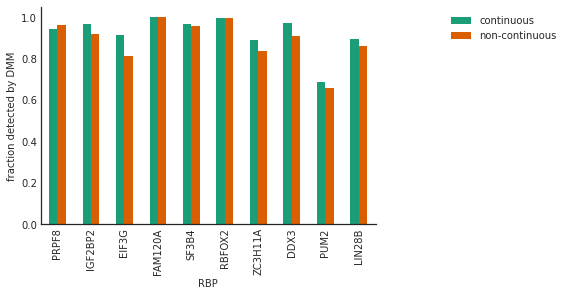

In [46]:
cont_data.set_index('RBP').plot.bar()
plt.legend(bbox_to_anchor = (1.2, 1))
plt.ylabel('fraction detected by DMM')
sns.despine()